In [1]:
import os

from xcube.core.store import new_data_store
from xcube.core.maskset import MaskSet
import matplotlib.pyplot as plt
import xarray as xr

In [2]:
xr.set_options(display_expand_attrs=False)

In [3]:
s3_store = new_data_store(
    "s3",
    root=os.environ["S3_USER_STORAGE_BUCKET"],
    max_depth=10,
    storage_options=dict(
        anon=False,
        key=os.environ["S3_USER_STORAGE_KEY"],
        secret=os.environ["S3_USER_STORAGE_SECRET"],
    ),
)

In [4]:
ds = s3_store.open_data("cubes/training/0.1.0/0000_1.zarr")
ds

<xarray.Dataset> Size: 55MB
Dimensions:                   (time: 134, y: 90, x: 90, time_era5: 367,
                               time_lccs: 2, band: 12, angle: 2, angle_y: 2,
                               angle_x: 2)
Coordinates:
  * angle                     (angle) <U7 56B 'Zenith' 'Azimuth'
  * angle_x                   (angle_x) float64 16B 4.831e+05 4.881e+05
  * angle_y                   (angle_y) float64 16B 6.769e+06 6.764e+06
  * band                      (band) <U3 144B 'B01' 'B02' 'B03' ... 'B11' 'B12'
    spatial_ref               int64 8B ...
  * time                      (time) datetime64[ns] 1kB 2021-05-03T10:56:19.0...
  * time_era5                 (time_era5) datetime64[ns] 3kB 2021-05-03 ... 2...
  * time_lccs                 (time_lccs) datetime64[ns] 16B 2021-01-01 2022-...
  * x                         (x) float64 720B 4.831e+05 4.831e+05 ... 4.84e+05
  * y                         (y) float64 720B 6.765e+06 6.765e+06 ... 6.764e+06
Data variables: (12/118)
    cloud_mask                (time, y, x) uint8 1MB dask.array<chunksize=(20, 90, 90), meta=np.ndarray>
    dem                       (y, x) float32 32kB dask.array<chunksize=(90, 90), meta=np.ndarray>
    era5_d2m_max              (time_era5) float32 1kB dask.array<chunksize=(367,), meta=np.ndarray>
    era5_d2m_mean             (time_era5) float32 1kB dask.array<chunksize=(367,), meta=np.ndarray>
    era5_d2m_median           (time_era5) float32 1kB dask.array<chunksize=(367,), meta=np.ndarray>
    era5_d2m_min              (time_era5) float32 1kB dask.array<chunksize=(367,), meta=np.ndarray>
    ...                        ...
    lccs_observation_count    (time_lccs, y, x) uint16 32kB dask.array<chunksize=(2, 90, 90), meta=np.ndarray>
    lccs_processed_flag       (time_lccs, y, x) float32 65kB dask.array<chunksize=(2, 90, 90), meta=np.ndarray>
    s2l2a                     (band, time, y, x) float32 52MB dask.array<chunksize=(12, 20, 90, 90), meta=np.ndarray>
    scl                       (time, y, x) uint8 1MB dask.array<chunksize=(20, 90, 90), meta=np.ndarray>
    solar_angle               (angle, time, angle_y, angle_x) float32 4kB dask.array<chunksize=(2, 20, 2, 2), meta=np.ndarray>
    viewing_angle             (angle, band, time, angle_y, angle_x) float32 51kB dask.array<chunksize=(2, 12, 20, 2, 2), meta=np.ndarray>
Attributes: (24)

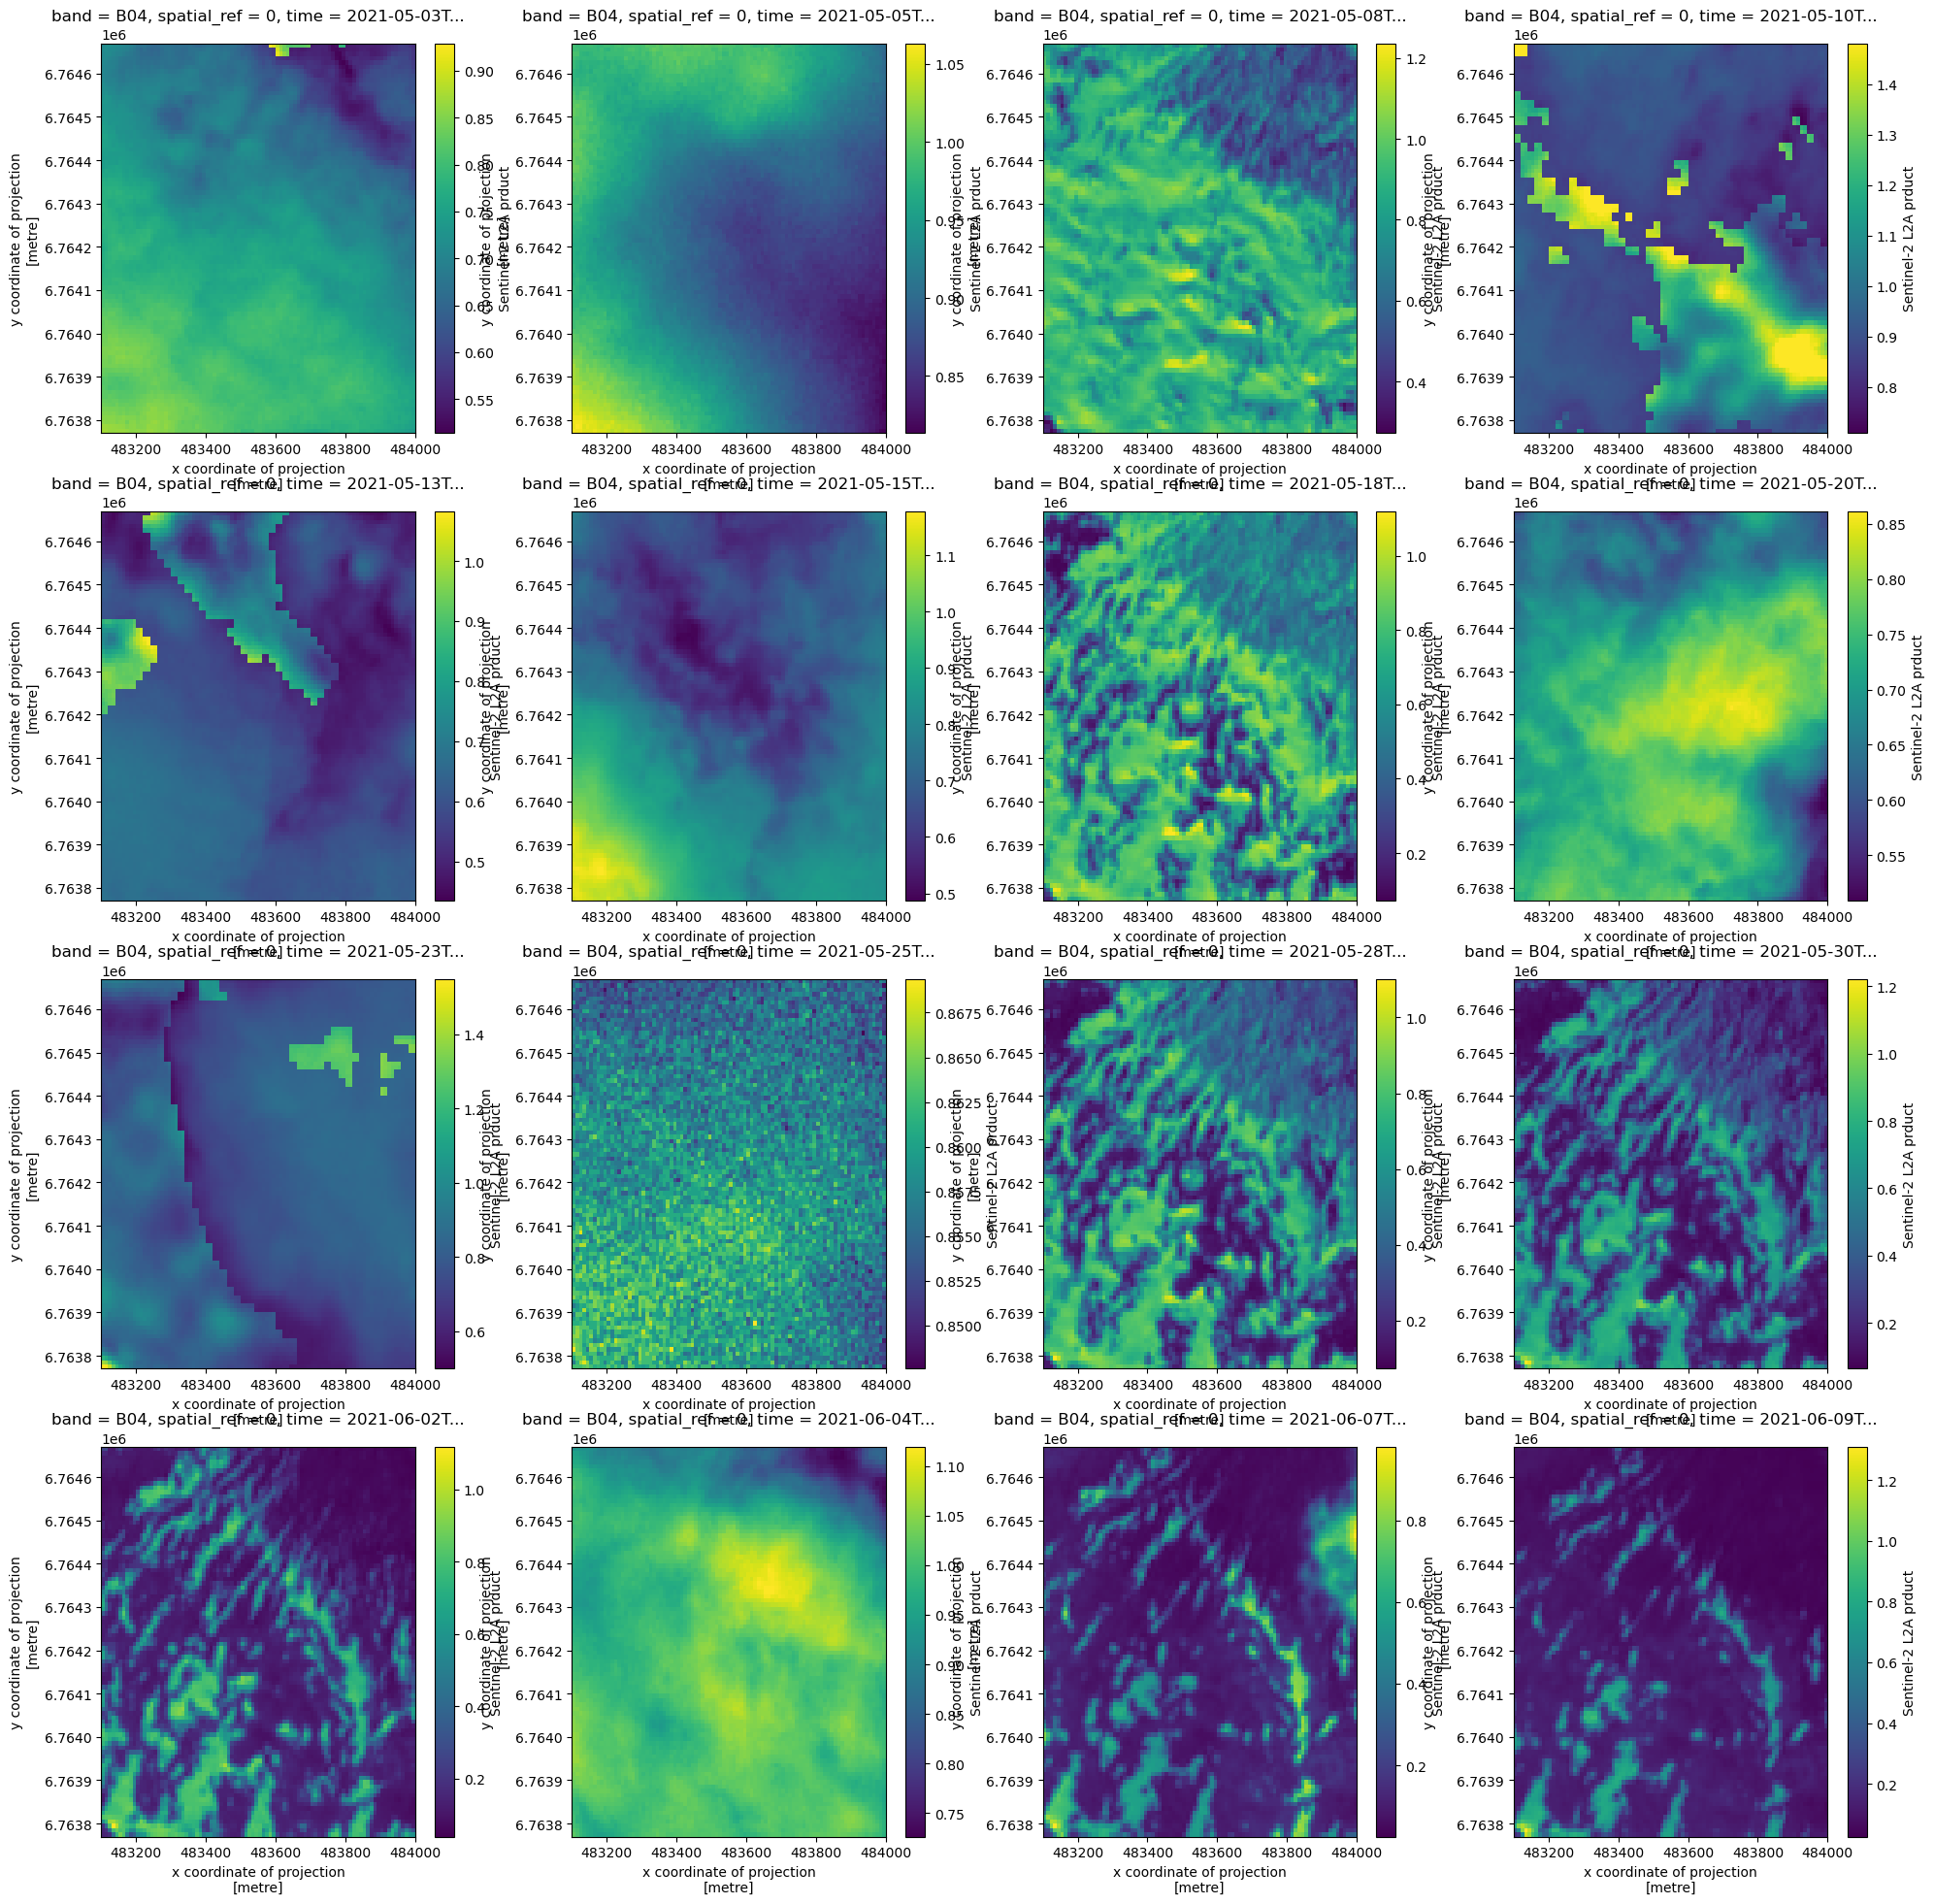

In [5]:
fig, _ax = plt.subplots(4, 4, figsize=(6*4, 6*4))
ax = _ax.flatten()
for i in range(16):
    ds.s2l2a.isel(time=i, band=3).plot(ax=ax[i])

In [6]:
cloud_mask_mask = MaskSet(ds.cloud_mask)
cmap, norm = cloud_mask_mask.get_cmap()
cloud_mask_mask

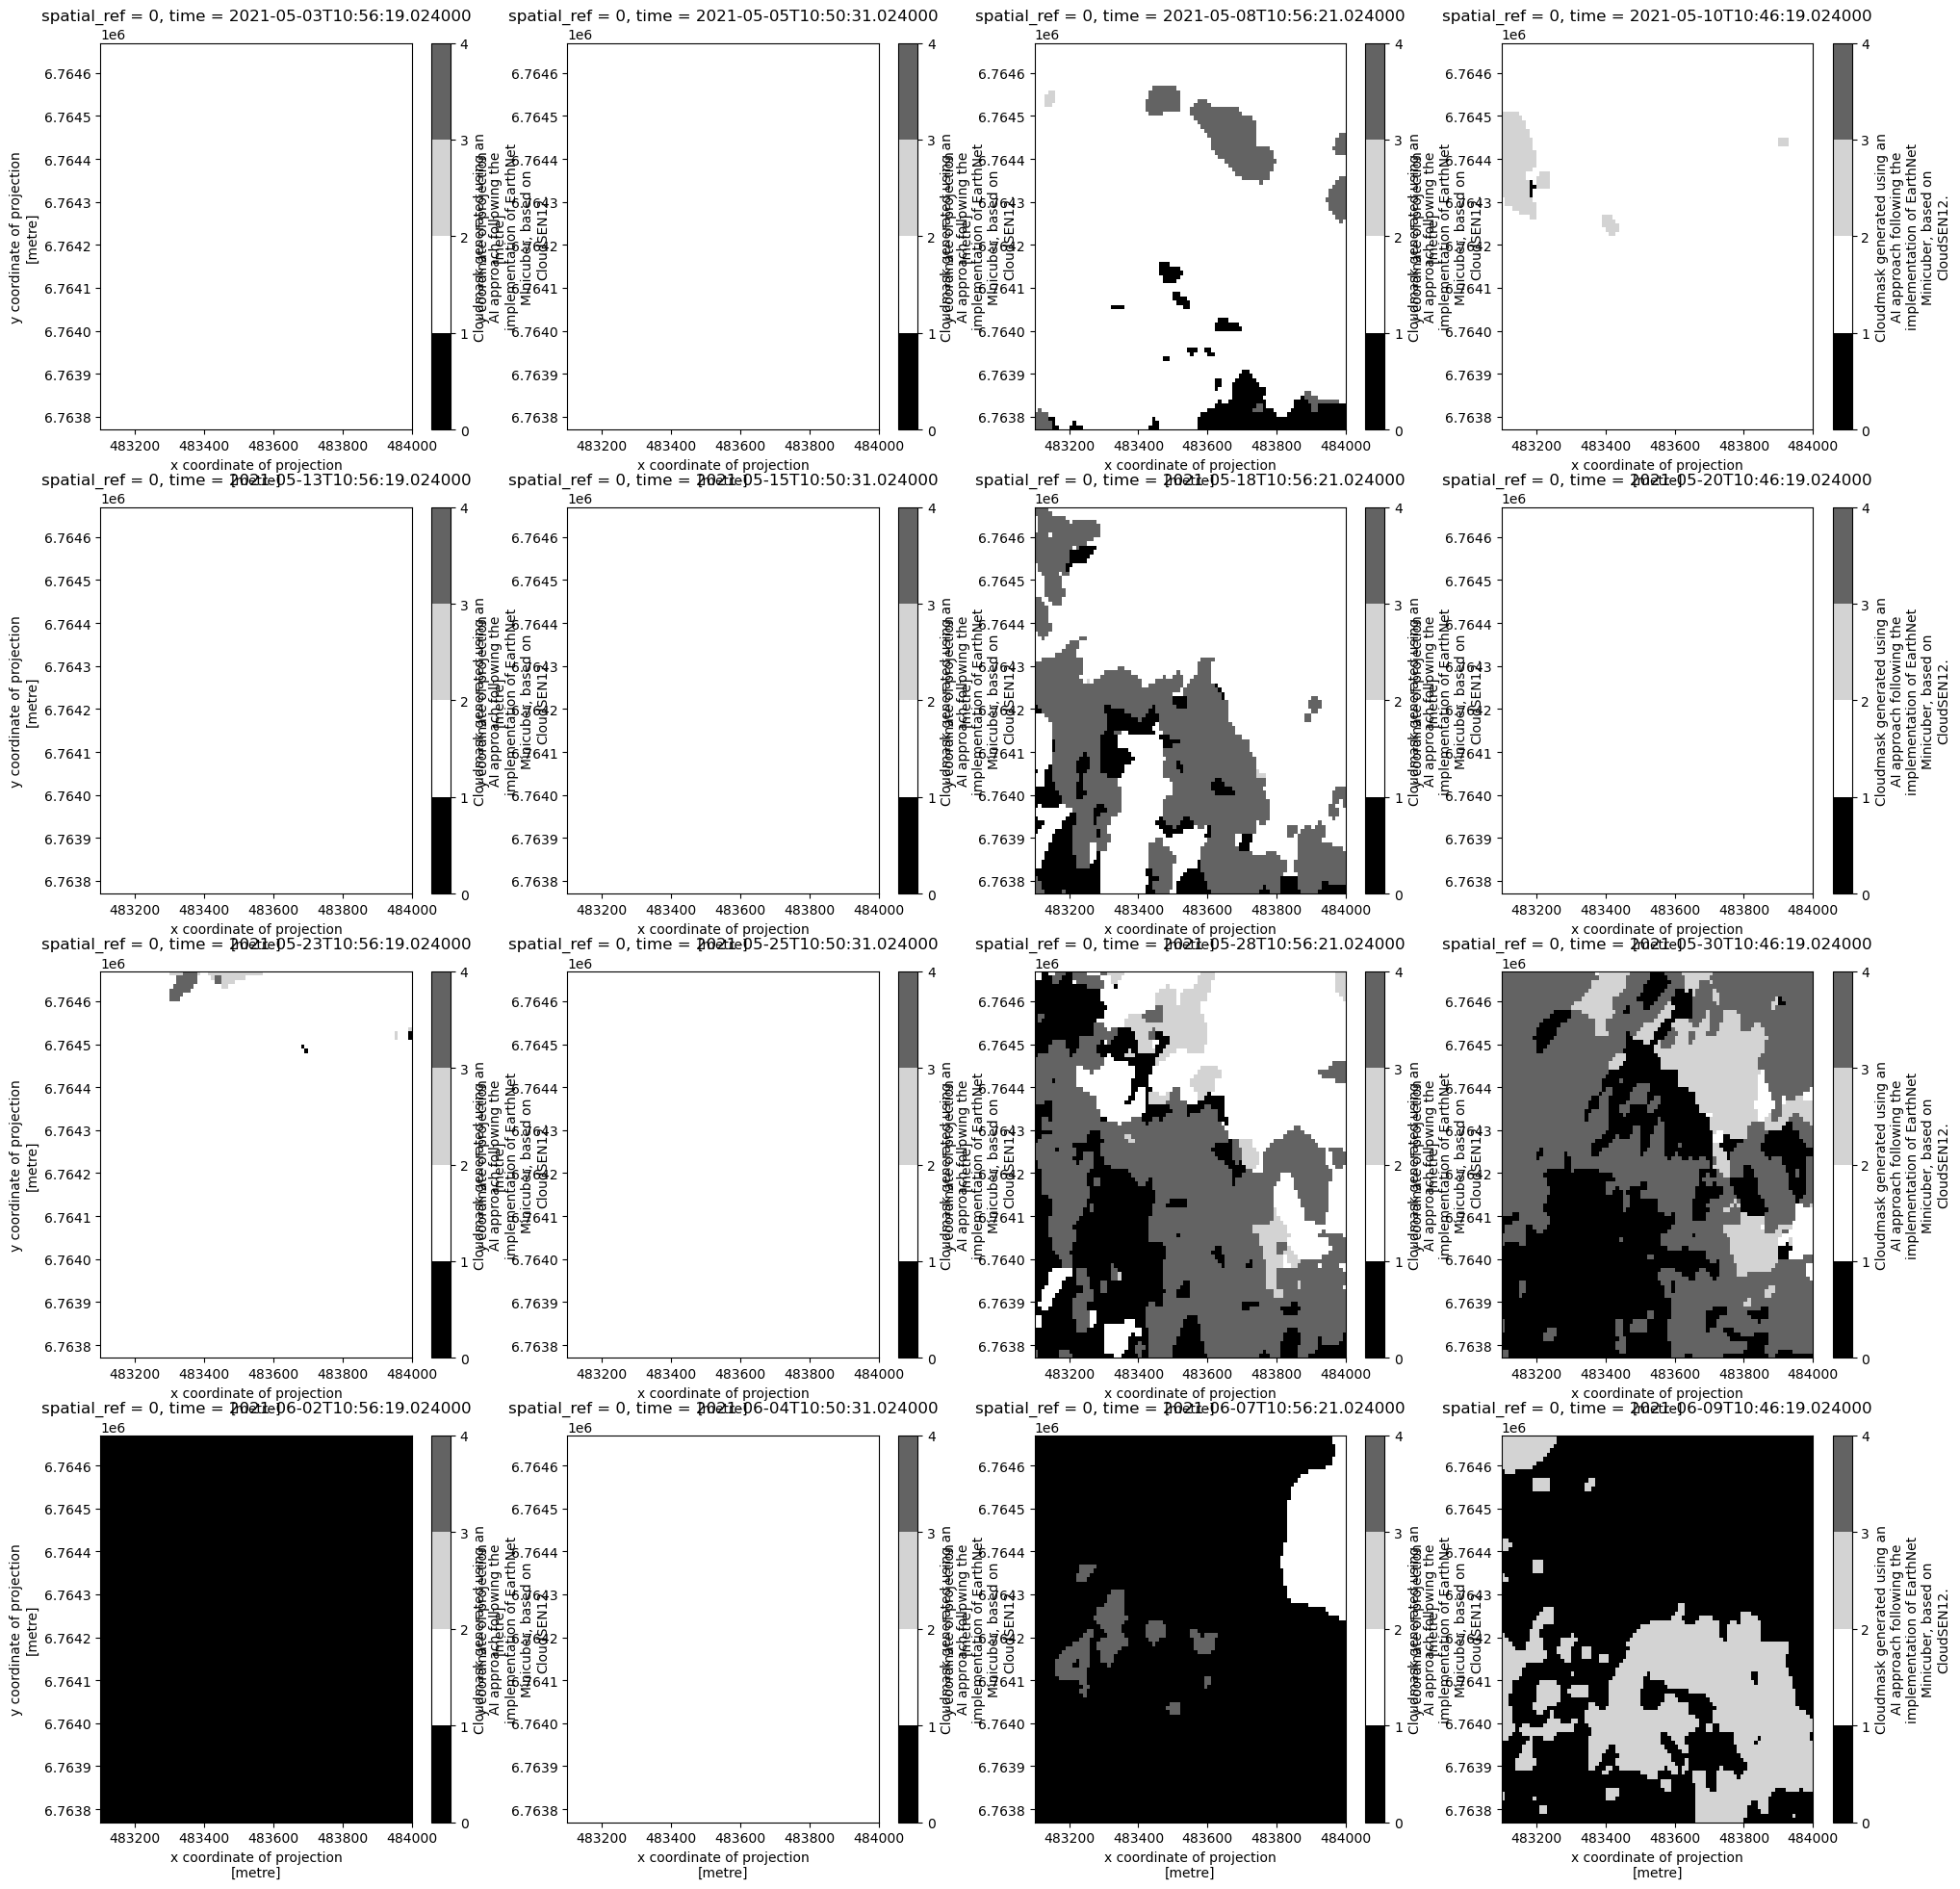

In [7]:
fig, _ax = plt.subplots(4, 4, figsize=(6*4, 6*4))
ax = _ax.flatten()
for i in range(16):
    ds.cloud_mask.isel(time=i).plot(ax=ax[i], cmap=cmap, norm=norm)

In [8]:
scl_mask = MaskSet(ds.scl)
cmap, norm = scl_mask.get_cmap()
scl_mask

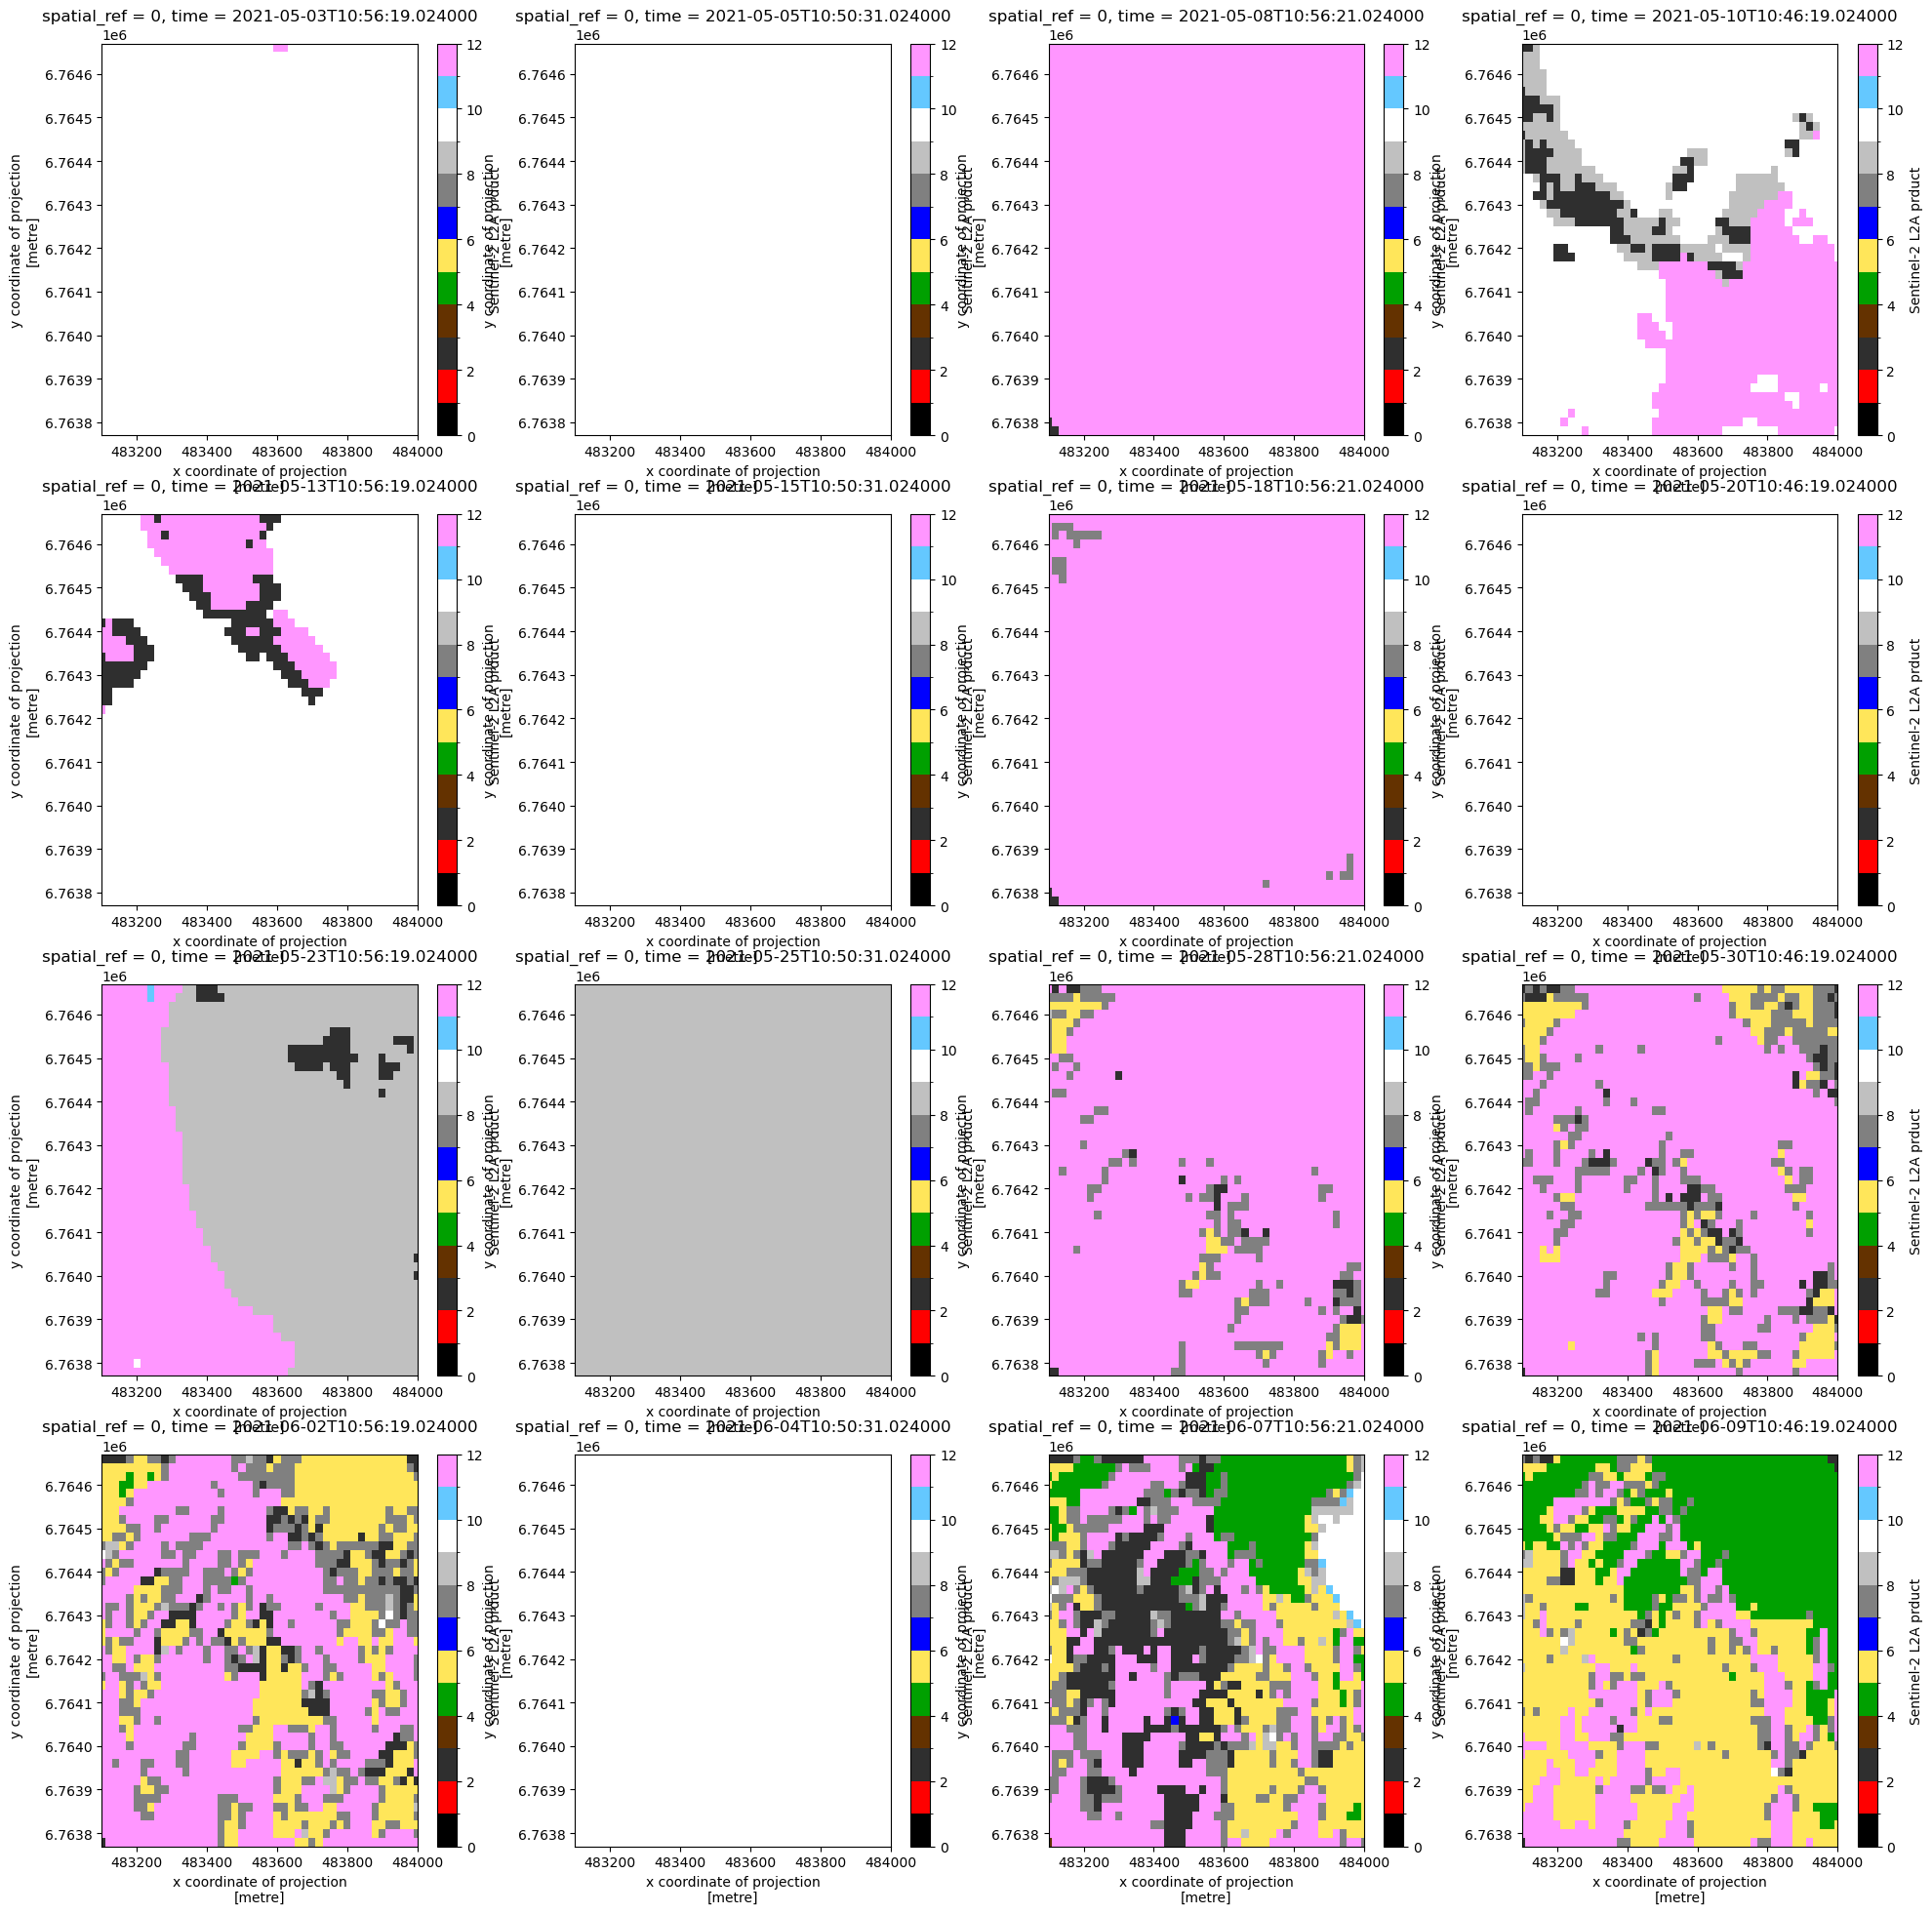

In [9]:
fig, _ax = plt.subplots(4, 4, figsize=(6*4, 6*4))
ax = _ax.flatten()
for i in range(16):
    ds.scl.isel(time=i).plot(ax=ax[i], cmap=cmap, norm=norm)

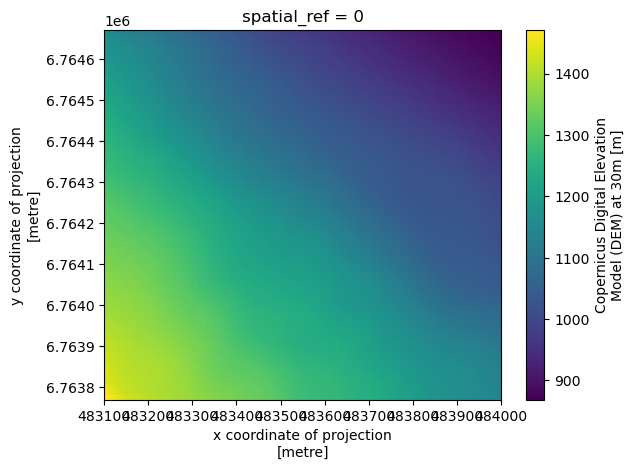

In [10]:
ds.dem.plot()

In [11]:
land_cover_mask = MaskSet(ds.lccs_class)
land_cover_mask

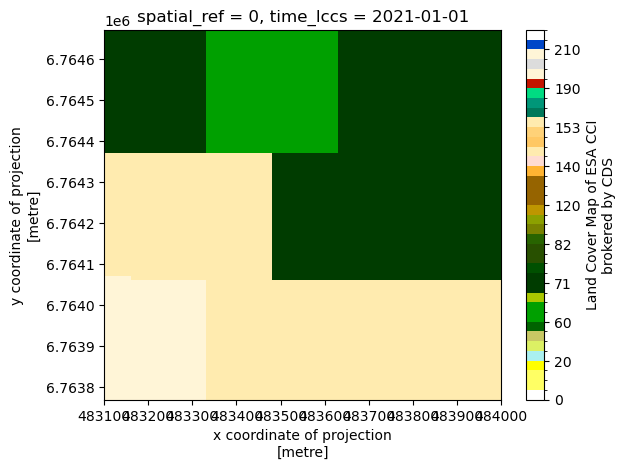

In [21]:
cmap, norm = land_cover_mask.get_cmap()
ds.lccs_class.isel(time_lccs=0).plot(cmap=cmap, norm=norm)

In [22]:
esa_wc_mask = MaskSet(ds.esa_wc)
esa_wc_mask

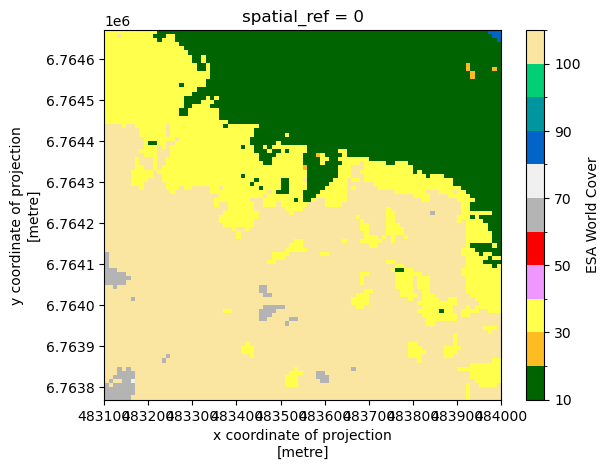

In [23]:
cmap, norm = esa_wc_mask.get_cmap()
ds.esa_wc.plot(cmap=cmap, norm=norm)

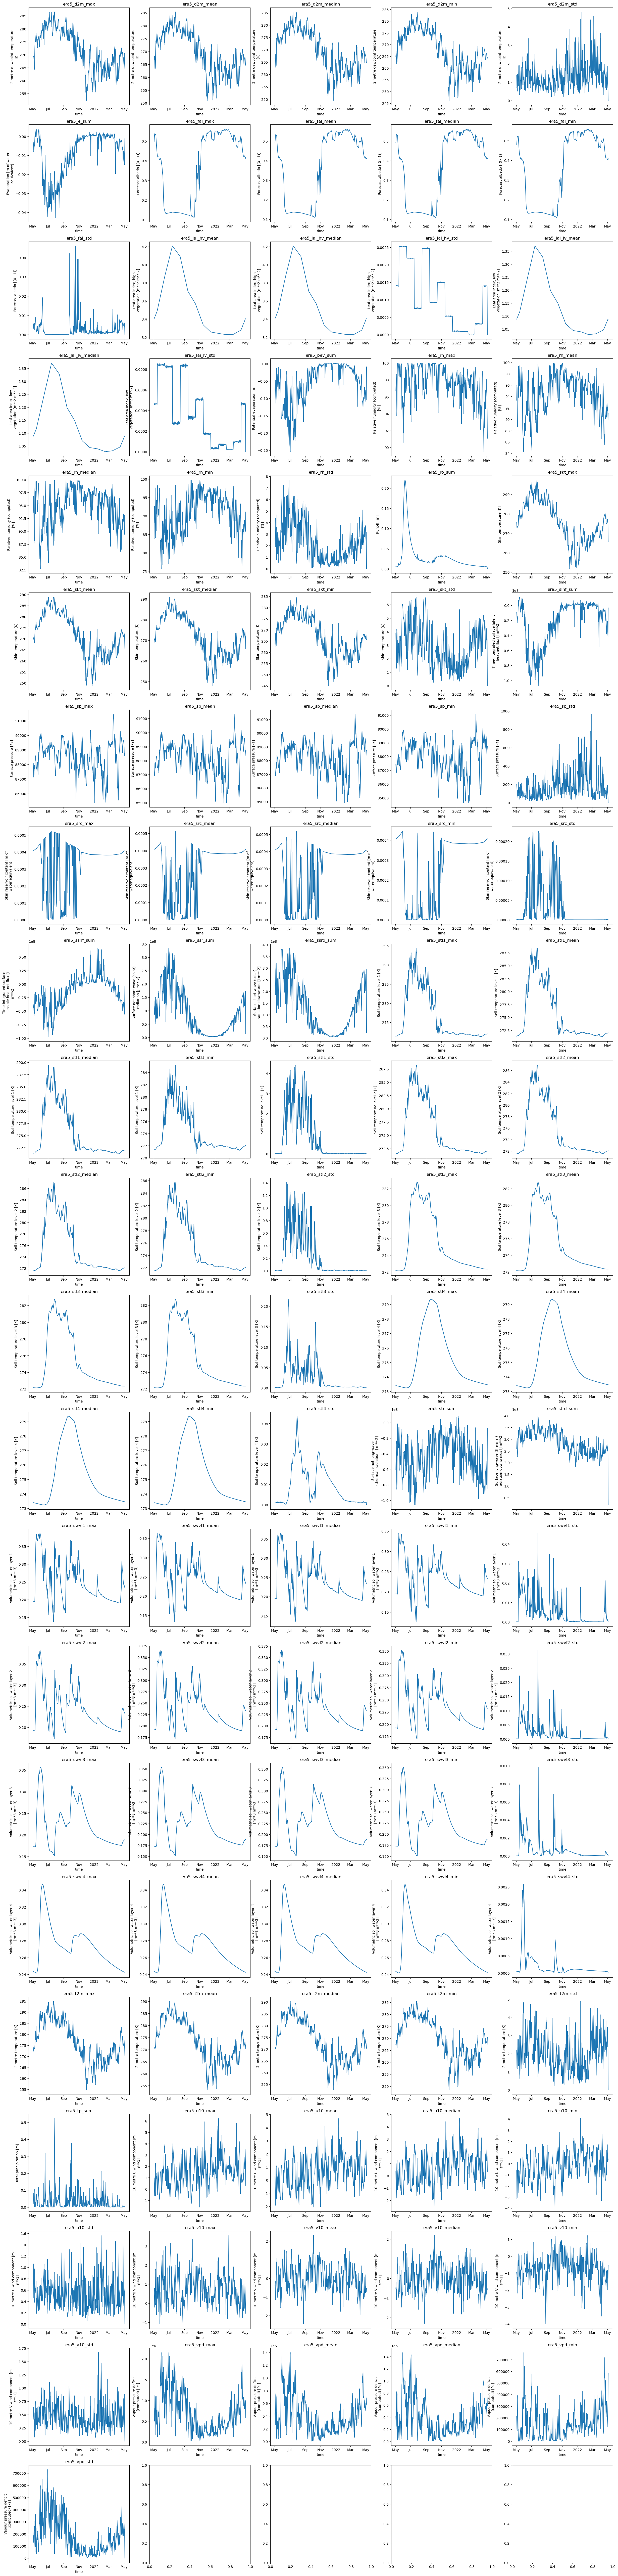

In [24]:
fig, _ax = plt.subplots(22, 5, figsize=(6*5, 6*22))
ax = _ax.flatten()
era5_vars = [var for var in ds.data_vars if "era5" in var]
for i, var in enumerate(era5_vars):
    ds[var].plot(ax=ax[i])
    ax[i].set_title(var)